In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os
from scipy.optimize import curve_fit

In [50]:
def read_data_from_file(file_path):
    return np.loadtxt(file_path)

# Directory containing all the text files
directory = "/home/shane/Dev/Research/Weak-measurement-group/Experimental-data/oscillo_5GS"

# Create a list of all text files in the directory
file_list = glob.glob(os.path.join(directory, "*.txt"))

# Initialize an empty dictionary to store the data from each file
data_dict = {}

# Loop through all text files in the directory
for file_path in file_list:
    # Get the file name without the directory path
    filename = os.path.basename(file_path)
    # Read data from the file and store it in the dictionary
    data_dict[filename] = read_data_from_file(file_path)

"""
for filename, data in data_dict.items():
    print(f"Data from file '{filename}':")
    print(data)
    print()
"""


'\nfor filename, data in data_dict.items():\n    print(f"Data from file \'{filename}\':")\n    print(data)\n    print()\n'

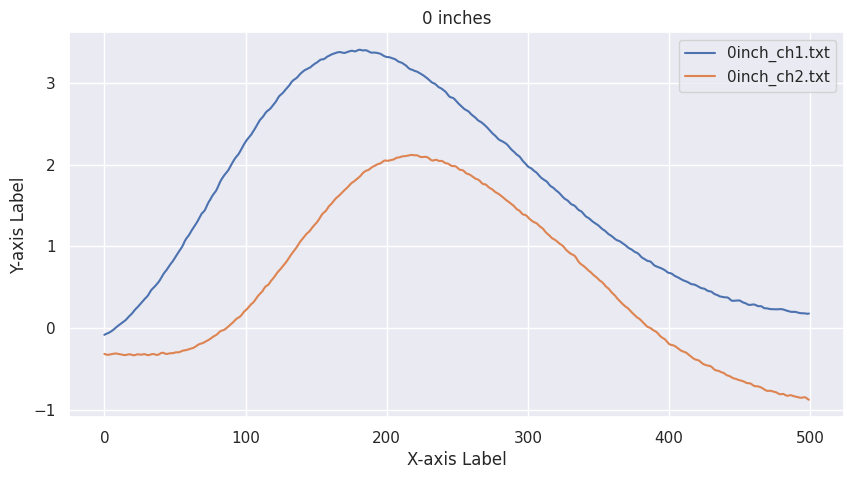

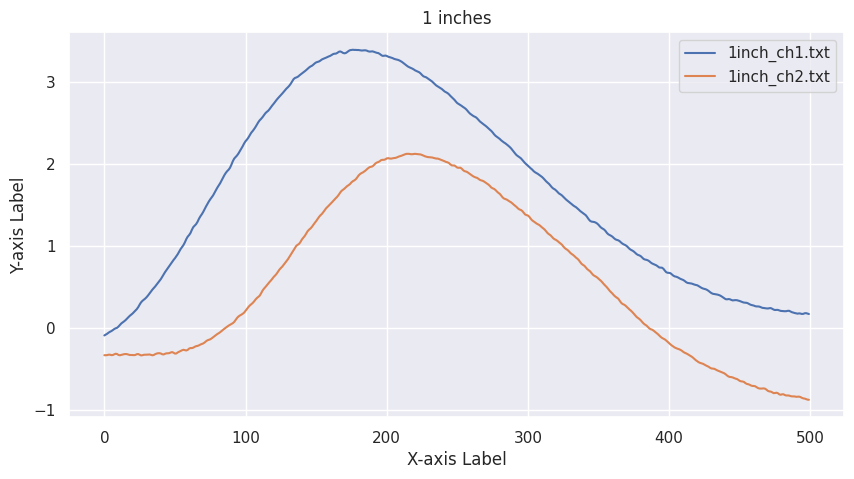

In [51]:
sb.set()

plt.figure(figsize=(10, 5))
for filename, data in list(data_dict.items())[:2]:
    plt.plot(data, label=filename)

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.legend()
plt.title('0 inches')
plt.show()

# Plot the other two data files separately
plt.figure(figsize=(10, 5))
for filename, data in list(data_dict.items())[2:]:
    plt.plot(data, label=filename)

# Add labels and legend to the plot
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.legend()
plt.title('1 inches')
plt.show()

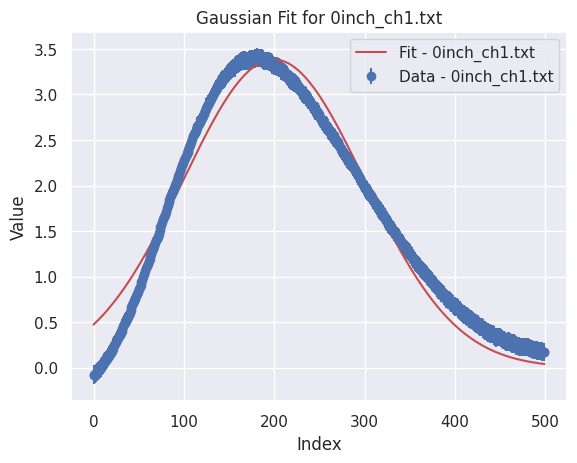

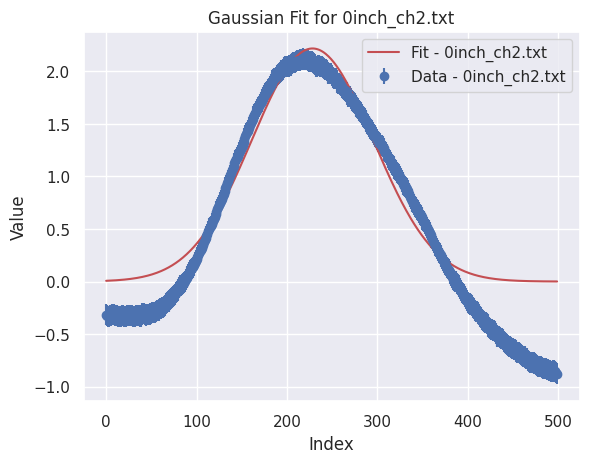

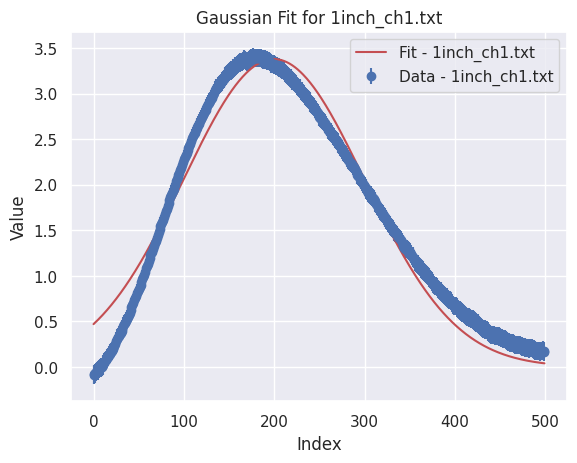

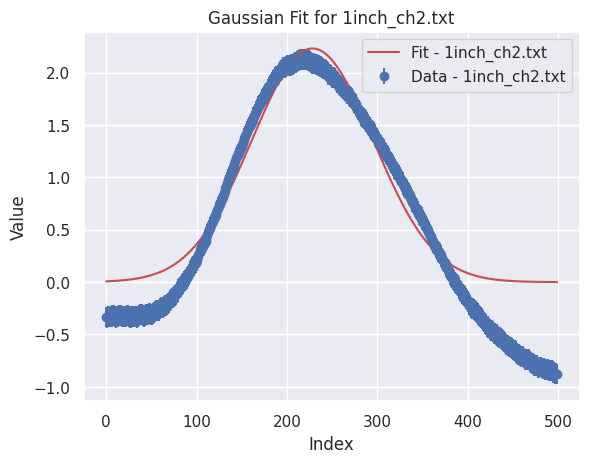

In [52]:
# Gaussian function
def gaussian(x, amplitude, mean, standard_deviation):
    return amplitude * np.exp(-(x - mean)**2 / (2 * standard_deviation**2))


def fit_gaussian_to_data(x, y):
    # Initial guess for the parameters of the Gaussian function
    initial_guess = [1.0, np.mean(x), np.std(x)]
    # Perform the curve fit using the Gaussian function
    optimal_params, _ = curve_fit(gaussian, x, y, p0=initial_guess)
    return optimal_params

# Curve fit each data file and plot the results
for filename, data in data_dict.items():
    x = np.arange(len(data))  # Assuming the data points are equidistant
    params = fit_gaussian_to_data(x, data)

    # Plot the data
    plt.errorbar(x, data, yerr=0.1, label=f"Data - {filename}", fmt='o')

    # Generate the fitted Gaussian curve using the obtained parameters
    fitted_curve = gaussian(x, params[0], params[1], params[2])

    # Plot the fitted curve
    plt.plot(x, fitted_curve, color='r', label=f"Fit - {filename}")

    # Set labels and legend for the plot
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend()

    # Title for the plot
    plt.title(f"Gaussian Fit for {filename}")

    # Show the plot for each data file
    plt.show()